# Exploratory Data Analysis (EDA) of Cleaned Dataset

### 1. Importing Libraries and Dataset

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('./cleaned_datasets/enlarged_dataset.csv')

# Display the first few rows
data.head()


,PO_NUM,ITEM_NAME,PART_DESCRIPTION,ITEM_CODE,SUPPLIER_NAME,SUPPLIER_CODE,ORDERED_QUANTITY,FAULTED_PARTS,PRICE,PO_VALUE,DOWNPAYMENT_DATE,DELIVERY_DATE
0,100000,Gripper,Pneumatic gripper for robotic arms,MOT7793,MOTHERSON SUMI WIRING INDIA LIMITED,VD904014,39,0,3740.04,145861.56,2023-09-05,2023-09-26
1,100000,3D Printer,Compact 3D printer for prototyping,MOT1546,MOTHERSON SUMI WIRING INDIA LIMITED,VD904014,180,9,2547.14,458485.20,2023-10-22,2023-11-29
2,100001,Pressure Sensor,High-precision pressure sensor,KYO7240,"KYOWA MANUFACTURING CO., LTD",VD650721,67,0,220.82,14794.94,2023-09-30,2023-11-06
3,100001,Proximity Sensor,Inductive proximity sensor,KYO2884,"KYOWA MANUFACTURING CO., LTD",VD650721,179,0,4716.11,844183.69,2023-12-03,2023-12-30
4,100002,Control Cabinet,Industrial control cabinet with locks,IND4956,INDEANA ENGINEERING,VD671527,300,15,1526.58,457974.00,2023-09-02,2023-12-10


### 2. Descriptive Statistics

In [19]:

# Generate summary statistics
data.describe()


,PO_NUM,ORDERED_QUANTITY,FAULTED_PARTS,PRICE,PO_VALUE
count,58667.000000,58667.000000,58667.000000,58667.000000,5.866700e+04
mean,115010.739496,150.165408,5.705882,2563.427641,3.847127e+05
std,8657.877555,86.742675,25.070171,1454.977483,3.361677e+05
min,100000.000000,1.000000,0.000000,41.350000,6.384000e+01
25%,107535.000000,75.000000,0.000000,1300.845000,1.083448e+05
50%,114965.000000,150.000000,0.000000,2575.440000,2.881368e+05
75%,122516.500000,225.000000,3.000000,3729.720000,5.871222e+05
max,129999.000000,300.000000,300.000000,5987.200000,1.747144e+06


### 3. Distribution of Ordered Quantities

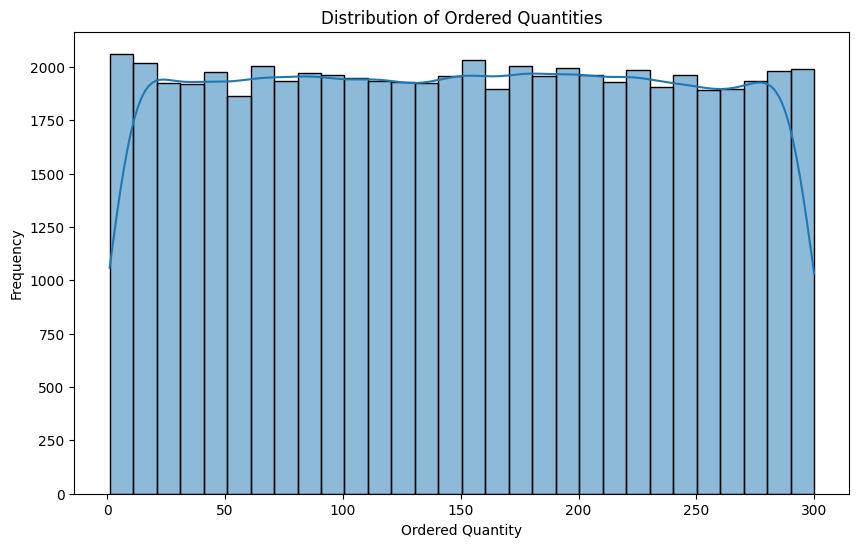

In [20]:

# Plot histogram of ordered quantities
plt.figure(figsize=(10, 6))
sns.histplot(data['ORDERED_QUANTITY'], bins=30, kde=True)
plt.title('Distribution of Ordered Quantities')
plt.xlabel('Ordered Quantity')
plt.ylabel('Frequency')
plt.show()


### 4. Distribution of Prices

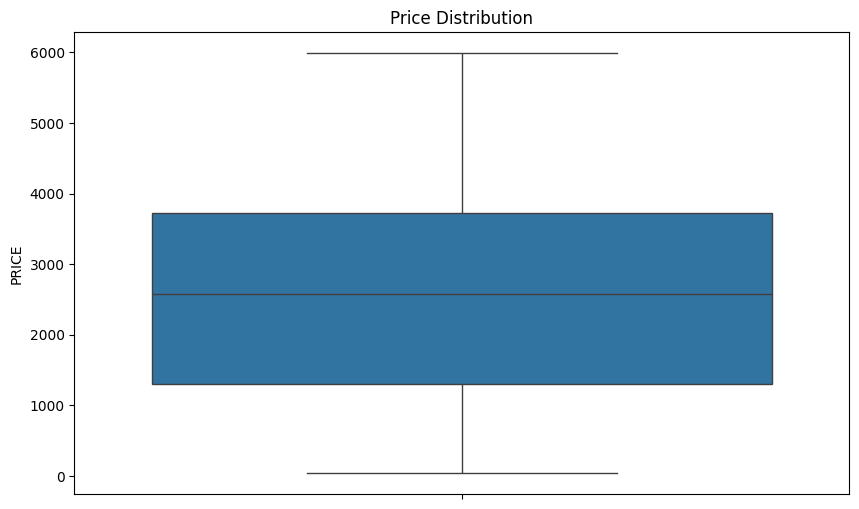

In [21]:

# Plot boxplot for prices to spot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data['PRICE'])
plt.title('Price Distribution')
plt.show()


### 5. Relationship Between PO Value and Ordered Quantity

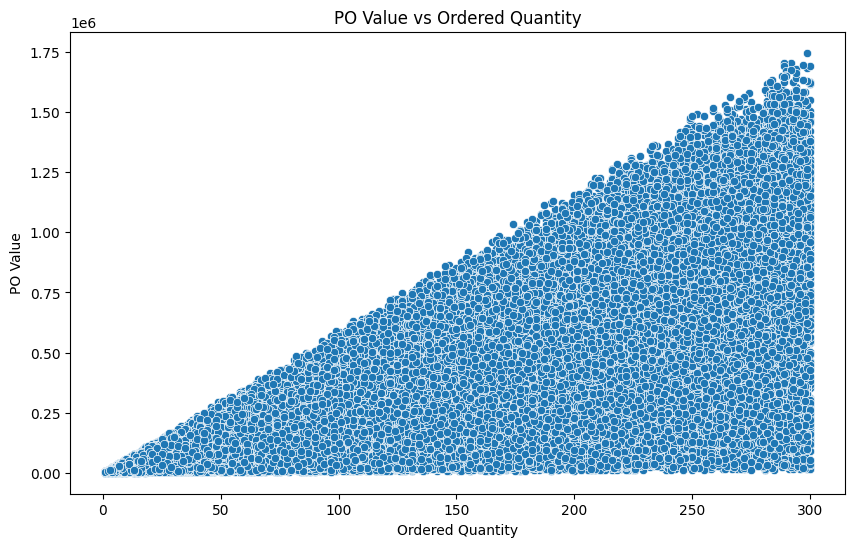

In [22]:

# Scatter plot for PO value vs Ordered Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ORDERED_QUANTITY', y='PO_VALUE', data=data)
plt.title('PO Value vs Ordered Quantity')
plt.xlabel('Ordered Quantity')
plt.ylabel('PO Value')
plt.show()


### 6. Distribution of Faulted Parts

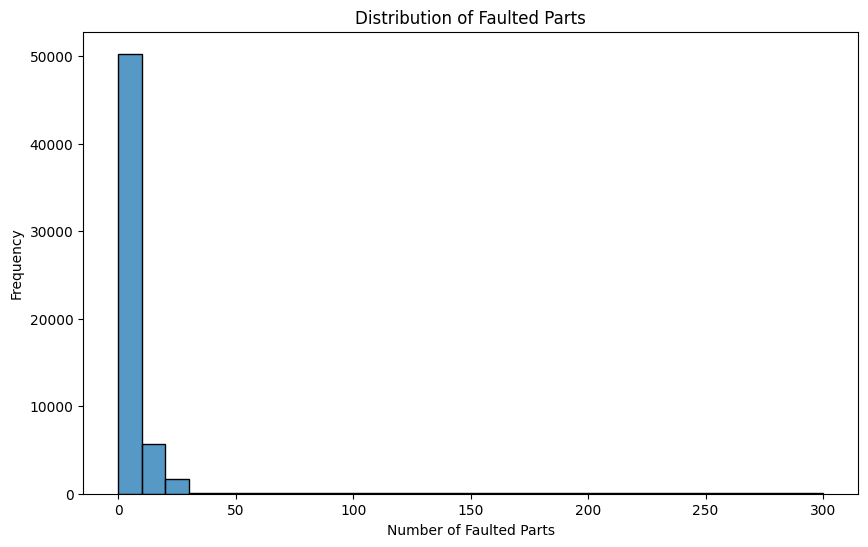

In [23]:

# Plot histogram of faulted parts
plt.figure(figsize=(10, 6))
sns.histplot(data['FAULTED_PARTS'], bins=30, kde=False)
plt.title('Distribution of Faulted Parts')
plt.xlabel('Number of Faulted Parts')
plt.ylabel('Frequency')
plt.show()


### 7. Supplier-wise Item Counts

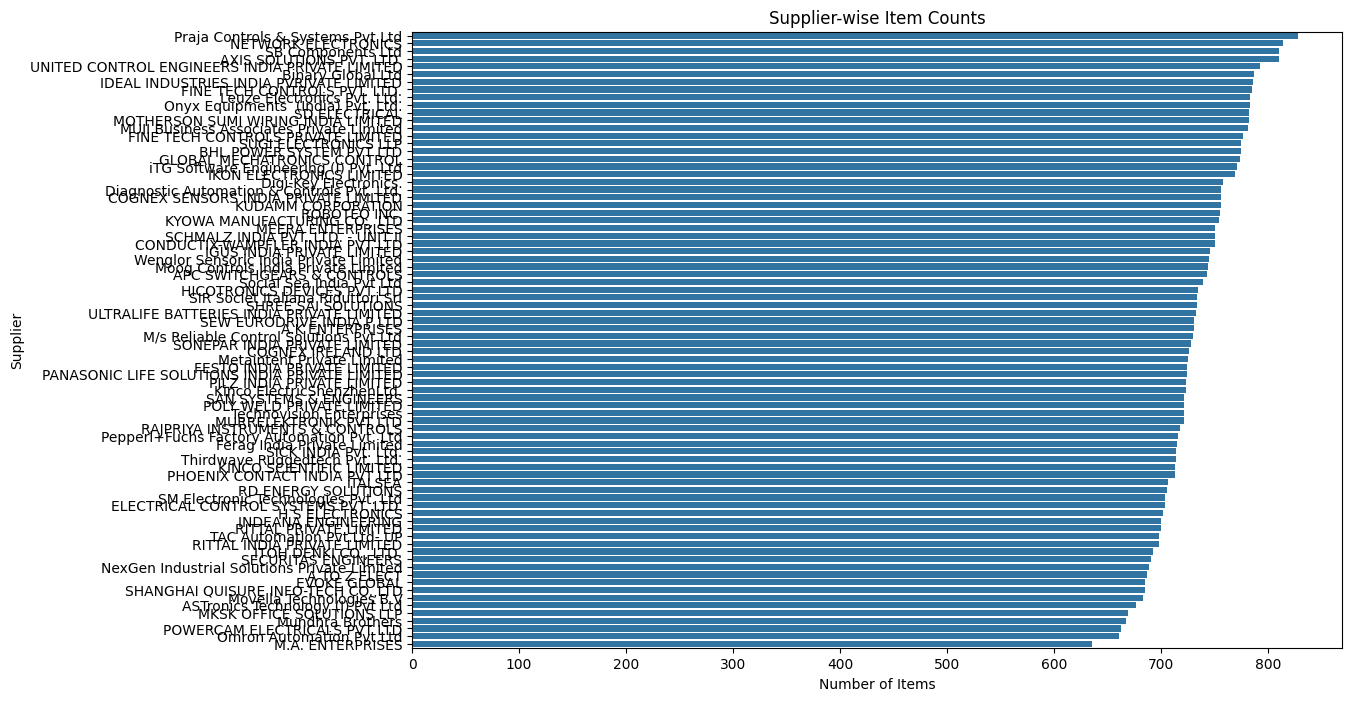

In [24]:

# Count plot for items per supplier
plt.figure(figsize=(12, 8))
sns.countplot(y='SUPPLIER_NAME', data=data, order=data['SUPPLIER_NAME'].value_counts().index)
plt.title('Supplier-wise Item Counts')
plt.xlabel('Number of Items')
plt.ylabel('Supplier')
plt.show()


### 8. Delivery Time Analysis

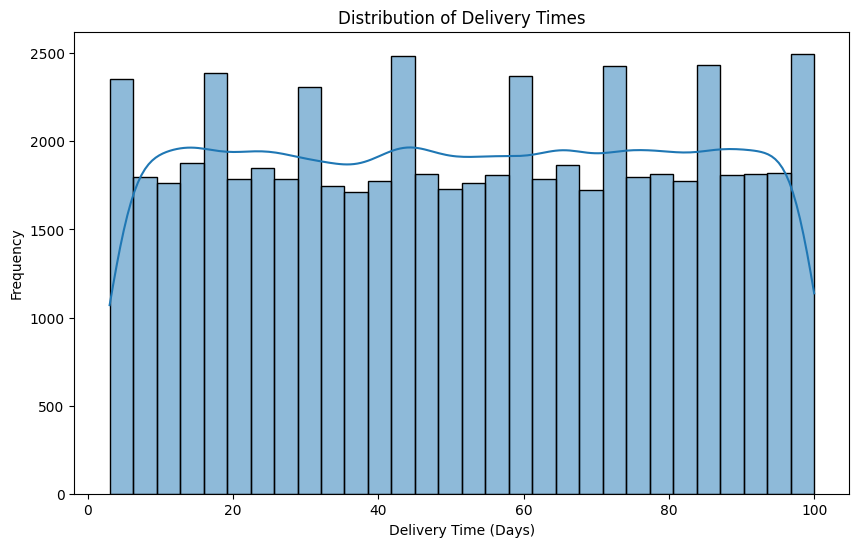

In [25]:

# Calculate delivery times in days
data['DOWNPAYMENT_DATE'] = pd.to_datetime(data['DOWNPAYMENT_DATE'])
data['DELIVERY_DATE'] = pd.to_datetime(data['DELIVERY_DATE'])
data['DELIVERY_TIME_DAYS'] = (data['DELIVERY_DATE'] - data['DOWNPAYMENT_DATE']).dt.days

# Plot delivery times
plt.figure(figsize=(10, 6))
sns.histplot(data['DELIVERY_TIME_DAYS'], bins=30, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()


### 9. Conclusion

This notebook provided an overview of the procurement dataset, analyzing key features like ordered quantities, prices, PO values, faulted parts, and delivery times. We also explored supplier contributions and item distributions. This analysis will be useful for assessing supplier reliability and optimizing future procurement processes.